In [5]:
import os
os.chdir("C:/Users/HewletPackard/myPython/")

import pandas as pd
import numpy as np

data=pd.read_csv("project2.csv", sep=';', header=0, index_col=False, decimal=',')
data.head()

,insurance,gdp,geo,destiny,unem,wom,men,salary,age
0,1,104103.04,2,233.70,5.4,65.0,65.0,5462,82.29
1,1,80189.70,2,207.00,2.6,64.0,65.0,6374,82.90
2,1,75504.57,2,17.00,3.9,67.0,67.0,3500,82.51
3,1,70056.87,2,3.47,3.5,55.0,60.0,32500,82.47
4,0,69330.69,2,60.30,4.8,66.0,66.0,4080,81.61


In [2]:
print(data.shape)
print(len(data))

(92, 9)
92


In [3]:
data.dtypes

insurance      int64
gdp          float64
geo            int64
destiny      float64
unem         float64
wom          float64
men          float64
salary         int64
age          float64
dtype: object

In [4]:
data.describe(include='all')

,insurance,gdp,geo,destiny,unem,wom,men,salary,age
count,92.000000,92.000000,92.000000,92.000000,92.000000,92.000000,92.000000,92.000000,92.000000
mean,0.684783,20282.898478,1.804348,293.823478,6.513804,60.319565,62.389674,2159.076087,75.917935
std,0.467148,22254.888760,0.828598,1034.113656,3.974550,3.933716,3.137985,3585.459301,4.966017
min,0.000000,660.280000,1.000000,1.800000,0.100000,50.000000,50.000000,62.000000,64.950000
25%,0.000000,4074.992500,1.000000,25.300000,3.775000,57.750000,60.000000,597.750000,71.662500
50%,1.000000,10538.205000,2.000000,77.550000,5.450000,60.000000,63.000000,1055.500000,75.665000
75%,1.000000,31028.575000,2.000000,134.962500,8.200000,63.575000,65.000000,3011.000000,80.907500
max,1.000000,104103.040000,5.000000,7326.000000,19.100000,67.000000,67.000000,32500.000000,84.230000


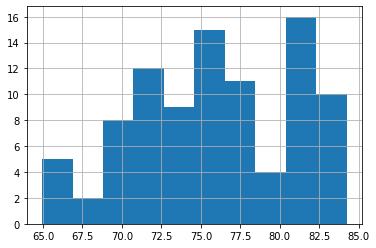

In [6]:
data['age'].hist()

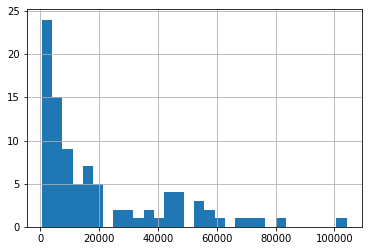

In [102]:
data['gdp'].hist(bins=30)

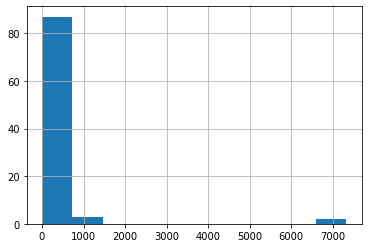

In [6]:
data['destiny'].hist()

In [7]:
from scipy.stats.kde import gaussian_kde
from numpy import linspace, hstack
from pylab import plot, show, hist


D:\anaconds3\lib\site-packages\ipykernel_launcher.py:4: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  after removing the cwd from sys.path.


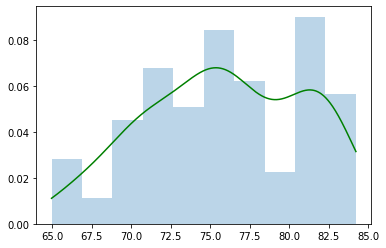

In [8]:
my_dest=gaussian_kde(data['age'])
x=linspace(min(data['age']), max(data['age']), 1000)
plot(x, my_dest(x),'g')
hist(data['age'], normed=1, alpha=.3)
show()

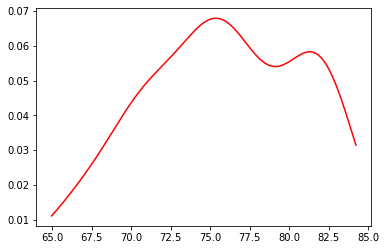

In [105]:
plot(x, my_dest(x), 'r')

Text(0.5, 0.98, '')

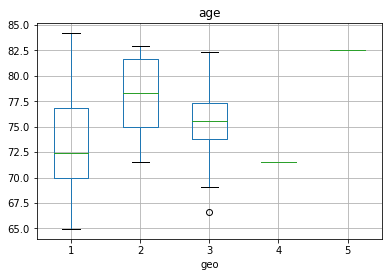

In [9]:
ax=data.boxplot(column='age', by = 'geo')
ax.get_figure().suptitle('')

Text(0.5, 0.98, '')

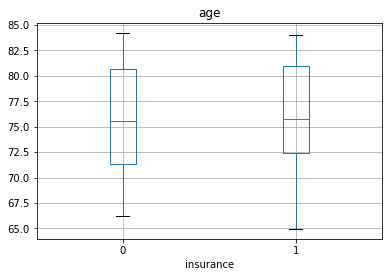

In [10]:
ax=data.boxplot(column='age', by = 'insurance')
ax.get_figure().suptitle('')

In [11]:
print(data['insurance'].value_counts())

1    63
0    29
Name: insurance, dtype: int64


In [12]:
print(data['geo'].value_counts())

1    38
2    37
3    15
5     1
4     1
Name: geo, dtype: int64


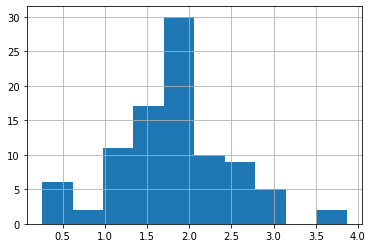

In [13]:
z=np.log10(data[u'destiny'])
pd.Series(z).hist()

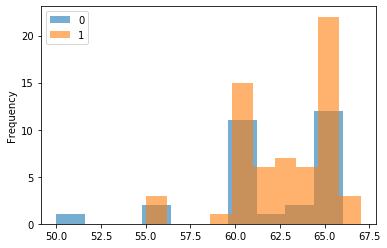

In [14]:
import matplotlib.pyplot as plt 
data.groupby('insurance')['men'].plot.hist(alpha=0.6)
plt.legend();

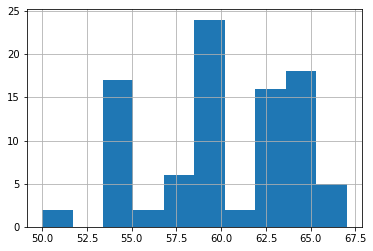

In [15]:
data['wom'].hist()

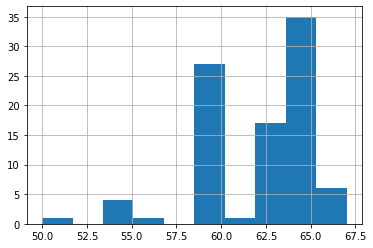

In [16]:
data['men'].hist()

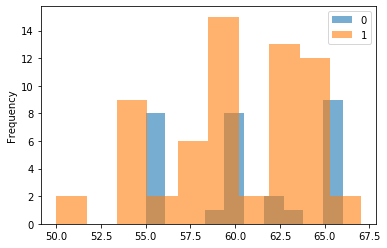

In [17]:
import matplotlib.pyplot as plt 
data.groupby('insurance')['wom'].plot.hist(alpha=0.6)
plt.legend();

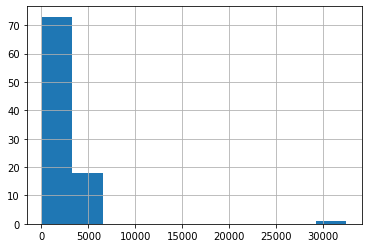

In [18]:
data['salary'].hist()

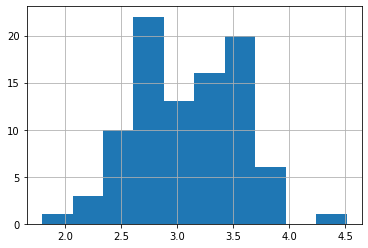

In [19]:
y=np.log10(data[u'salary'])
pd.Series(y).hist()

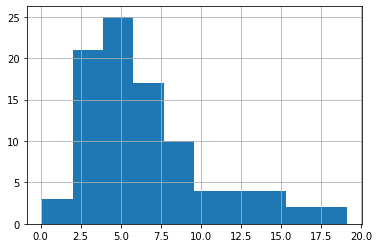

In [20]:
data['unem'].hist()

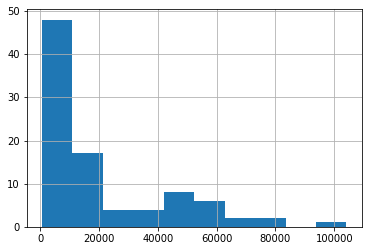

In [21]:
data['gdp'].hist()

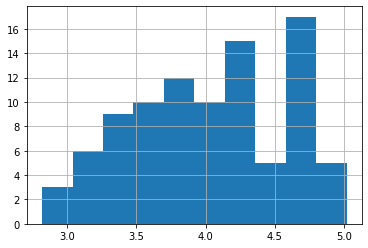

In [22]:
s=np.log10(data[u'gdp'])
pd.Series(s).hist()

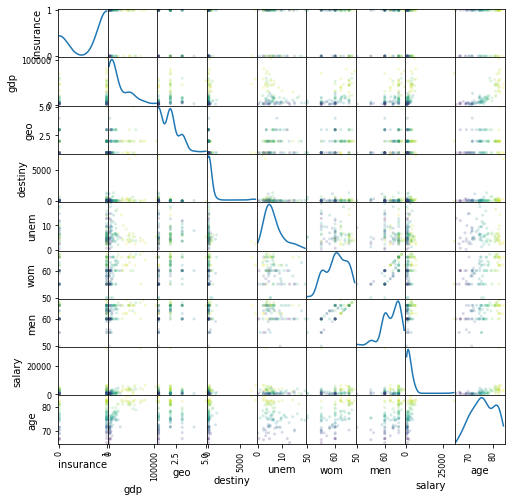

In [9]:
from pandas.plotting import scatter_matrix
scatter_matrix(data,
              figsize=(8,8),
              diagonal='kde',
              c=data['age'].replace(),
              alpha=0.2,
              );

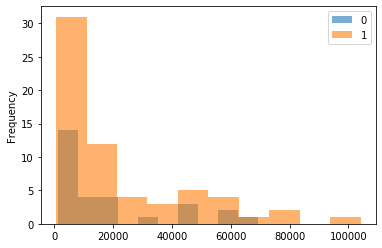

In [24]:
import matplotlib.pyplot as plt 
data.groupby('insurance')['gdp'].plot.hist(alpha=0.6)
plt.legend();

Text(0.5, 0.98, '')

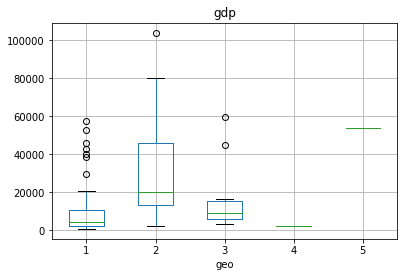

In [25]:
ab=data.boxplot(column='gdp', by = 'geo')
ab.get_figure().suptitle('')

In [26]:
correlations_data = data.corr()['age'].sort_values()
print(correlations_data)

unem        -0.104785
insurance    0.074939
geo          0.214322
destiny      0.251621
salary       0.424807
men          0.488236
wom          0.527240
gdp          0.766873
age          1.000000
Name: age, dtype: float64


In [27]:
features = data.copy()

# Select the numeric columns
numeric_subset = data.select_dtypes('number')

# Create columns with log of numeric columns
for col in numeric_subset.columns:
    # Skip the Energy Star Score column
    if col == 'age':
        next
    else:
        numeric_subset['log_' + col] = np.log(numeric_subset[col])
        
# Select the categorical columns
categorical_subset = data[['insurance', 'geo']]

# One hot encode
categorical_subset = pd.get_dummies(categorical_subset)

# Join the two dataframes using concat
# Make sure to use axis = 1 to perform a column bind
features = pd.concat([numeric_subset, categorical_subset], axis = 1)

features  = features.dropna(axis=1, how = 'all')
print(features.shape)


(92, 19)


D:\anaconds3\lib\site-packages\pandas\core\series.py:853: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [107]:
print(features)

    insurance       gdp    age  geo  destiny  unem   wom   men  salary  \
0           1   4131.62  72.03    1    89.20   5.2  61.0  64.0     200   
1           1   8837.46  72.30    1     6.82   4.8  59.0  63.0     450   
2           1  25533.00  71.59    2     8.57   4.9  60.0  65.0     690   
3           0   3936.80  74.61    2   100.40  17.7  63.0  63.0     350   
4           0   5726.03  73.83    2    47.89   8.1  55.0  60.0     465   
..        ...       ...    ...  ...      ...   ...   ...   ...     ...   
87          0   2058.04  70.31    1   103.00  14.9  55.0  60.0     712   
88          0   8523.75  79.58    1   735.50   6.2  55.0  60.0    2332   
89          1   4129.75  74.33    1   106.00  19.1  55.0  60.0    2571   
90          1    660.28  64.95    1    57.00  12.9  55.0  60.0     665   
91          0   2412.73  71.48    4    95.00   7.8  60.0  60.0     670   

    log_insurance    log_gdp   log_geo  log_destiny  log_unem   log_wom  \
0             0.0   8.326425  0.0000

In [28]:
print (np.var(data))

insurance    2.158554e-01
gdp          4.898966e+08
geo          6.791115e-01
destiny      1.057767e+06
unem         1.562534e+01
wom          1.530592e+01
men          9.739921e+00
salary       1.271578e+07
age          2.439327e+01
dtype: float64


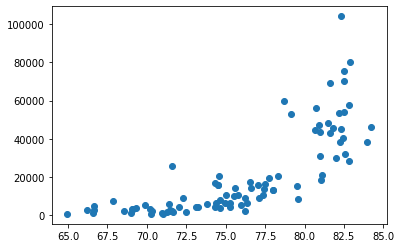

In [29]:
plt.scatter(data['age'], data['gdp'])

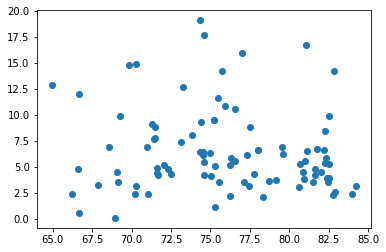

In [125]:
plt.scatter(data['age'], data['unem'])

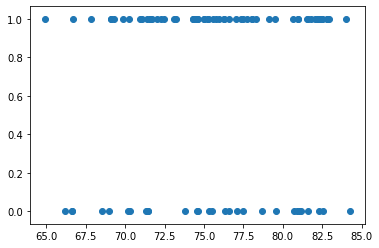

In [126]:
plt.scatter(data['age'], data['insurance'])

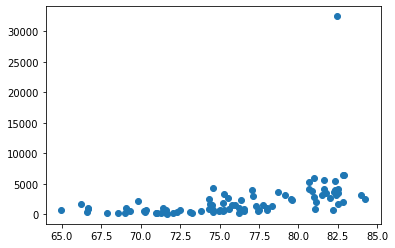

In [129]:
plt.scatter(data['age'], data['salary'])

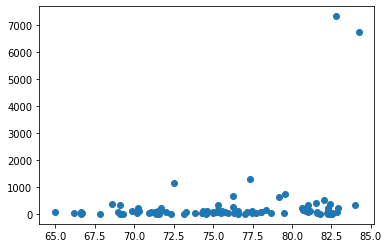

In [130]:
plt.scatter(data['age'], data['destiny'])

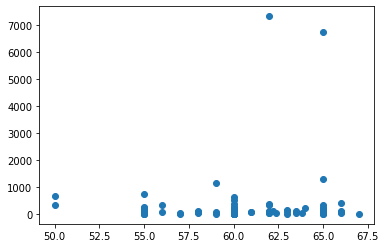

In [131]:
plt.scatter(data['wom'], data['destiny'])

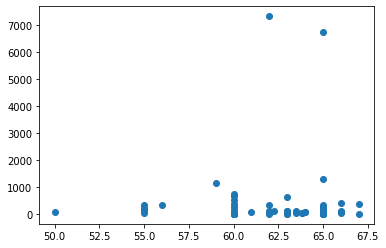

In [132]:
plt.scatter(data['men'], data['destiny'])

In [6]:
from pandas import read_csv, DataFrame
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

dataset=pd.read_csv("project1.csv", sep=';', header=0, index_col=False, decimal=',')
dataset.head()

,insurance,gdp,age,geo,destiny,unem,wom,men,salary
0,1,10535.79,77.34,1,1312.9,6.1,65.0,65.0,1403
1,1,1516.51,72.49,1,1142.0,4.3,59.0,59.0,717
2,0,8523.75,79.58,1,735.5,6.2,55.0,60.0,2332
3,1,8826.99,76.25,1,650.0,5.2,50.0,60.0,962
4,1,52960.00,79.15,1,644.5,3.7,60.0,63.0,3108


In [7]:
trg=dataset[['age']]
trn=dataset[['gdp','salary', 'wom']]

In [32]:
dataset.corr()

,insurance,gdp,age,geo,destiny,unem,wom,men,salary
insurance,1.000000,0.087124,0.095844,-0.203163,0.143255,-0.130888,-0.012436,0.154406,0.052896
gdp,0.087124,1.000000,0.756618,0.212788,0.015259,-0.230093,0.532467,0.455602,0.537861
age,0.095844,0.756618,1.000000,0.257265,0.138730,-0.075375,0.516647,0.489591,0.419327
geo,-0.203163,0.212788,0.257265,1.000000,-0.354413,0.063345,0.409127,0.359559,0.049856
destiny,0.143255,0.015259,0.138730,-0.354413,1.000000,-0.179966,-0.061488,-0.074722,-0.035276
unem,-0.130888,-0.230093,-0.075375,0.063345,-0.179966,1.000000,-0.154405,-0.093008,-0.122638
wom,-0.012436,0.532467,0.516647,0.409127,-0.061488,-0.154405,1.000000,0.763891,0.023454
men,0.154406,0.455602,0.489591,0.359559,-0.074722,-0.093008,0.763891,1.000000,0.044250
salary,0.052896,0.537861,0.419327,0.049856,-0.035276,-0.122638,0.023454,0.044250,1.000000


In [38]:
Xtrn, Xtest, Ytrn, Ytest = train_test_split(trn, trg, test_size=0.4)

In [8]:
models = [LinearRegression(), # метод наименьших квадратов
	          RandomForestRegressor(n_estimators=100, max_features ='sqrt'), # случайный лес
	          KNeighborsRegressor(n_neighbors=6), # метод ближайших соседей
	          SVR(kernel='linear'), # метод опорных векторов с линейным ядром
	          LogisticRegression() # логистическая регрессия
	          ]

In [10]:
#создаем временные структуры
TestModels = DataFrame()
tmp = {}
#для каждой модели из списка
for model in models:
#получаем имя модели
    m = str(model)
    tmp['Model'] = m[:m.index('(')]    
    #для каждого столбцам результирующего набора
    for i in  xrange(Ytrn.shape[1]):
        #обучаем модель
        model.fit(Xtrn, Ytrn[:,i]) 
        #вычисляем коэффициент детерминации
            tmp['R2_Y%s'%str(i+1)] = r2_score(Ytest[:,0], model.predict(Xtest))
        #записываем данные и итоговый DataFrame
        TestModels = TestModels.append([tmp])
    #делаем индекс по названию модели
    TestModels.set_index('Model', inplace=True)

IndentationError: unexpected indent (<ipython-input-10-023c00fc112b>, line 14)

In [ ]:

import matplotlib.pyplot as plt

import numpy as np

import pandas as pd

In [10]:
dataset['ones'] = 1
Y = dataset['age']

X = dataset[['gdp', 'salary', 'wom', 'ones']]

X2only = dataset[['gdp', 'ones']]

X3only = dataset[['salary', 'ones']]

def get_r2(X, Y):
    w=np.linalg.solve(X.T.dot(X), X.T.dot(Y))

    d1=Y-X.dot(w)
    d2=Y-Y.mean()
    r2=1-d1.dot(d1)/d2.dot(d2)

    return r2

a=get_r2(X2only, Y)
b=get_r2(X3only, Y)
c=get_r2(X, Y)

print ("r2 for x2 only:", a)

print ("r2 for x3 only:", b)

print ("r2 for both:", c)


r2 for x2 only: 0.5724703517231574
r2 for x3 only: 0.17583530199053277
r2 for both: 0.5953068181623865


ValueError: matrices are not aligned